### Black Sea Grain Initiative Vessel Movements: 2022-2023

### Importing required modules 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Set the default number of rows/columns to be displayed

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
np.set_printoptions(suppress=True)

### Download the dataset

In [3]:
# Note: The data for this question was downloaded form:
# https://data.humdata.org/dataset/black-sea-grain-initiative-vessel-movements
#path = 'C:/Users/meetb/MyLearning/Project/'
path = '/Users/erv/Desktop/learndataa/Students/Python/Python_Beginner/from_Avani/github/'
sea = pd.read_csv(path + 'Black Sea Grain Initiative Voyages - Data.csv',sep=',')
sea.head(3)


,Status,Outbound Sequence,Vessel name,IMO,Departure port,Country,Commodity,Tonnage,Departure,Inspection İstanbul,Income group,Flag,World Bank region,UN region,Development category
0,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,"1,527",31-Jul-22,02-Aug-22,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing
1,Outbound +,1,RAZONI,9086526,Odesa,Egypt,Corn,"25,000",31-Jul-22,02-Aug-22,lower-middle income,Sierra Leone,Middle East & North Africa,Africa,developing
2,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,"33,000",04-Aug-22,05-Aug-22,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed


### Review data

In [4]:
#1) Print shape of the dataframe
print('1) shape of the dataframe: ',sea.shape,'\n')

#2) Print the number of rows and columns in the dataframe
print('2) number of rows: ',sea.shape[0])
print('   number of columns: ',sea.shape[1],'\n')

#3) total number of valuesin the dataframe
print('3) total number of values: ',sea.size,'\n')

#4) Type of data in each column
print('4) type of data in each column: ','\n',sea.dtypes,'\n')

#5) Print the number of missing values in each column
print('5) the number of missing values in each column', '\n',sea.isna().sum(),'\n') 

#6) Find any dupicate item in dataframe
print('6) duplicate item: ','\n',sea.duplicated().value_counts())


1) shape of the dataframe:  (697, 15) 

2) number of rows:  697
   number of columns:  15 

3) total number of values:  10455 

4) type of data in each column:  
 Status                  object
Outbound Sequence        int64
Vessel name             object
IMO                      int64
Departure port          object
Country                 object
Commodity               object
Tonnage                 object
Departure               object
Inspection İstanbul     object
Income group            object
Flag                    object
World Bank region       object
UN region               object
Development category    object
dtype: object 

5) the number of missing values in each column 
 Status                   0
Outbound Sequence        0
Vessel name              0
IMO                      0
Departure port           0
Country                  0
Commodity                0
Tonnage                  0
Departure                0
Inspection İstanbul     41
Income group             0
Flag      

In [5]:
# Print values from the first row only 
print('values from the first row only: ','\n',sea.iloc[0])

values from the first row only:  
 Status                               Outbound
Outbound Sequence                           1
Vessel name                            RAZONI
IMO                                   9086526
Departure port                          Odesa
Country                               Türkiye
Commodity                                Corn
Tonnage                                 1,527
Departure                           31-Jul-22
Inspection İstanbul                 02-Aug-22
Income group              upper-middle-income
Flag                             Sierra Leone
World Bank region       Europe & Central Asia
UN region                        Asia-Pacific
Development category               developing
Name: 0, dtype: object


### Preprocess Data

In [6]:
sea.columns

Index(['Status', 'Outbound Sequence', 'Vessel name', 'IMO', 'Departure port', 'Country', 'Commodity', 'Tonnage', 'Departure', 'Inspection İstanbul', 'Income group', 'Flag', 'World Bank region', 'UN region', 'Development category'], dtype='object')

#### Format column names:

In [7]:

# strip column names of left/right spaces and replace inner spaces with '_' underscore
# convert column names to lower case
# print column names

col_names = []
for col in sea.columns:
    column = col.strip().replace(' ','_').lower()
    col_names.append(column)
print('column names of dataframe: ','\n',col_names)

sea.columns=col_names
sea.head(3)   

column names of dataframe:  
 ['status', 'outbound_sequence', 'vessel_name', 'imo', 'departure_port', 'country', 'commodity', 'tonnage', 'departure', 'inspection_i̇stanbul', 'income_group', 'flag', 'world_bank_region', 'un_region', 'development_category']


,status,outbound_sequence,vessel_name,imo,departure_port,country,commodity,tonnage,departure,inspection_i̇stanbul,income_group,flag,world_bank_region,un_region,development_category
0,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,"1,527",31-Jul-22,02-Aug-22,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing
1,Outbound +,1,RAZONI,9086526,Odesa,Egypt,Corn,"25,000",31-Jul-22,02-Aug-22,lower-middle income,Sierra Leone,Middle East & North Africa,Africa,developing
2,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,"33,000",04-Aug-22,05-Aug-22,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed


#### Converting datatypes as necessary:

In [8]:

# Convert column 'tonnage' to float
# Convert columns 'departue', 'inspection_istanbul' to datetime

sea['tonnage'].replace(',','',regex=True,inplace=True)
sea = sea.astype({'tonnage':float})

sea['departure'] = pd.to_datetime(sea['departure'])
sea['inspection_i̇stanbul'] = pd.to_datetime(sea['inspection_i̇stanbul'])
sea.head(3)


/var/folders/xb/rcvz9t116mgc1sdw9wmrj3m00000gn/T/ipykernel_56784/155884768.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sea['departure'] = pd.to_datetime(sea['departure'])
/var/folders/xb/rcvz9t116mgc1sdw9wmrj3m00000gn/T/ipykernel_56784/155884768.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sea['inspection_i̇stanbul'] = pd.to_datetime(sea['inspection_i̇stanbul'])


,status,outbound_sequence,vessel_name,imo,departure_port,country,commodity,tonnage,departure,inspection_i̇stanbul,income_group,flag,world_bank_region,un_region,development_category
0,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,1527.0,2022-07-31,2022-08-02,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing
1,Outbound +,1,RAZONI,9086526,Odesa,Egypt,Corn,25000.0,2022-07-31,2022-08-02,lower-middle income,Sierra Leone,Middle East & North Africa,Africa,developing
2,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,33000.0,2022-08-04,2022-08-05,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed


#### Creating new columns  or Feature engineering:

In [9]:
# from departure get:

# - year and save in new column 'dep_year'
# - month and save in new column 'dep_month'
# - day and save in new column 'dep_day'
# - day_of_week and save in new column 'dep_dow'

sea['dep_year'] = pd.to_datetime(sea['departure']).dt.year
sea['dep_month'] = pd.to_datetime(sea['departure']).dt.month
sea['dep_day'] = pd.to_datetime(sea['departure']).dt.day
sea['dep_dow'] = pd.to_datetime(sea['departure']).dt.day_of_week

sea.head(3)

,status,outbound_sequence,vessel_name,imo,departure_port,country,commodity,tonnage,departure,inspection_i̇stanbul,income_group,flag,world_bank_region,un_region,development_category,dep_year,dep_month,dep_day,dep_dow
0,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,1527.0,2022-07-31,2022-08-02,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing,2022,7,31,6
1,Outbound +,1,RAZONI,9086526,Odesa,Egypt,Corn,25000.0,2022-07-31,2022-08-02,lower-middle income,Sierra Leone,Middle East & North Africa,Africa,developing,2022,7,31,6
2,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,33000.0,2022-08-04,2022-08-05,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed,2022,8,4,3


In [10]:
# from inspection_i̇stanbul get:

# - year and save in new column 'insp_year'
# - month and save in new column 'insp_month'
# - day and save in new column 'insp_day'
# - day_of_week and save in new column 'insp_dow'

sea['insp_year'] = pd.to_datetime(sea['inspection_i̇stanbul']).dt.year
sea['insp_month'] = pd.to_datetime(sea['inspection_i̇stanbul']).dt.month
sea['insp_day'] = pd.to_datetime(sea['inspection_i̇stanbul']).dt.day
sea['insp_dow'] = pd.to_datetime(sea['inspection_i̇stanbul']).dt.day_of_week

sea.head(3)

,status,outbound_sequence,vessel_name,imo,departure_port,country,commodity,tonnage,departure,inspection_i̇stanbul,income_group,flag,world_bank_region,un_region,development_category,dep_year,dep_month,dep_day,dep_dow,insp_year,insp_month,insp_day,insp_dow
0,Outbound,1,RAZONI,9086526,Odesa,Türkiye,Corn,1527.0,2022-07-31,2022-08-02,upper-middle-income,Sierra Leone,Europe & Central Asia,Asia-Pacific,developing,2022,7,31,6,2022.0,8.0,2.0,1.0
1,Outbound +,1,RAZONI,9086526,Odesa,Egypt,Corn,25000.0,2022-07-31,2022-08-02,lower-middle income,Sierra Leone,Middle East & North Africa,Africa,developing,2022,7,31,6,2022.0,8.0,2.0,1.0
2,Outbound,2,NAVI STAR,9590979,Odesa,Ireland,Corn,33000.0,2022-08-04,2022-08-05,high-income,Panama,Europe & Central Asia,Western Europe and Others,developed,2022,8,4,3,2022.0,8.0,5.0,4.0


In [11]:
print('Shape: ','\n',sea.shape,'\n')
print('Column_names: ', sea.columns,'\n')
print('Data types: ','\n',sea.dtypes)

Shape:  
 (697, 23) 

Column_names:  Index(['status', 'outbound_sequence', 'vessel_name', 'imo', 'departure_port', 'country', 'commodity', 'tonnage', 'departure', 'inspection_i̇stanbul', 'income_group', 'flag', 'world_bank_region', 'un_region', 'development_category', 'dep_year', 'dep_month', 'dep_day', 'dep_dow', 'insp_year', 'insp_month', 'insp_day', 'insp_dow'], dtype='object') 

Data types:  
 status                          object
outbound_sequence                int64
vessel_name                     object
imo                              int64
departure_port                  object
country                         object
commodity                       object
tonnage                        float64
departure               datetime64[ns]
inspection_i̇stanbul    datetime64[ns]
income_group                    object
flag                            object
world_bank_region               object
un_region                       object
development_category            object
dep_year      

### Dataset is clean and ready for analysis

#### looking into each column

In [12]:
# How many types of 'status' are there for ships leaving the port and coming into the port?

x = sea['status'].unique()
x_num = sea['status'].nunique()
print('types of status: ',x)
print('number of types of status: ',x_num)

types of status:  ['Outbound' 'Outbound +']
number of types of status:  2


In [13]:
# How many unique vessel names are there?

v = sea['vessel_name'].nunique()
print('number of vessel names: ',v)

number of vessel names:  481


In [14]:
# What are the names of departure ports?

d = sea['departure_port'].unique()
print('departure ports: ',d)

departure ports:  ['Odesa' 'Chornomorsk' 'Yuzhny/Pivdennyi']


In [15]:
# How many unique countries which trasport commodities?

c = sea['country'].nunique()
print('number of countries: ',c)

number of countries:  42


In [16]:
# What are different types of commodities that are transported by the ships?

s = sea['commodity'].unique()
print('commodity: ','\n',s,'\n')

# Total number of commodity
t = sea['commodity'].nunique()
print('number of commodity: ',t)

commodity:  
 ['Corn' 'Sunflower meal' 'Sunflower oil' 'Soya beans' 'Wheat'
 'Sunflower seed' 'Sugar beet pellets' 'Rapeseed' 'Peas' 'Barley'
 'Wheat bran pellets' 'Canola' 'Rapeseed meal' 'Mixed' 'Sunflower pellets'
 'Soya oil' 'Vegetable oil'] 

number of commodity:  17


In [17]:
# What are different type of income groups?

g = sea['income_group'].unique()
print('different type of income group: ','\n',g)

different type of income group:  
 ['upper-middle-income' 'lower-middle income' 'high-income' 'low-income']


In [18]:
# How many different flags are there?

f = sea['flag'].nunique()
print('number of flags: ',f)

# Is it one or more flag per country?

print('There are fewer flags than countries')

number of flags:  36
There are fewer flags than countries


In [19]:
# What is the minimum and maximum tonnage for the ships?

xmin = sea['tonnage'].min()
xmax = sea['tonnage'].max()

print('tonnage (min): ',xmin)
print('tonnage (max): ',xmax)


tonnage (min):  68.0
tonnage (max):  74500.0


### Exploratory Data Analysis

In [20]:
# What is the commodity with highest number of vessel names?
# What is the commodity with lowest number of vessel names?

df = sea.groupby(['commodity'])['vessel_name'].count().reset_index().rename(columns={'vessel_name':'vessel_count'})
df = df.sort_values('vessel_count', ascending = False)
df


,commodity,vessel_count
2,Corn,231
15,Wheat,192
11,Sunflower oil,83
10,Sunflower meal,44
7,Soya beans,41
0,Barley,40
5,Rapeseed,26
13,Sunflower seed,18
4,Peas,8
6,Rapeseed meal,3


In [21]:
# Comment:
# -- Corn has the highest number of vessel names that transoprt = 231
# -- Sugar beet pellets, Vegetable oil, Mixed, Wheat bran pellets are among to lowest with 1 vessel name

In [22]:
# What is the departure port sees highest number of commodity types?
# What is the departure port sees the least number of commodity types?

df = sea.groupby(['departure_port'])['commodity'].count().reset_index().rename(columns={'commodity':'commodity_count'})
df = df.sort_values('commodity_count',ascending=False)
df

,departure_port,commodity_count
0,Chornomorsk,285
1,Odesa,222
2,Yuzhny/Pivdennyi,190


In [23]:
# Comment: 
# -- Looks like all the ports are busy and see different types of commodities

In [24]:
# Which country is the main source of wheat?
# What percentage of total does it represent?

#sea.head(2)
df = sea[sea['commodity']=='Wheat']
df = df.groupby(['country'])['tonnage'].sum().reset_index().rename(columns={'tonnage':'tonnage_sum'})
df = df.sort_values(by = 'tonnage_sum', ascending = False)
df

df['percent']=round(100.0 *df['tonnage_sum']/df['tonnage_sum'].sum())
df

,country,tonnage_sum,percent
20,Spain,1108013.0,24.0
23,Türkiye,822286.0,18.0
8,Indonesia,340907.0,7.0
2,Bangladesh,323041.0,7.0
10,Italy,309721.0,7.0
5,Egypt,202200.0,4.0
1,Algeria,181770.0,4.0
22,Tunisia,170150.0,4.0
6,Ethiopia,167759.0,4.0
25,Yemen,152318.0,3.0


In [25]:
# Comment:
# -- Spain has the largest share 24% of Wheat transport

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

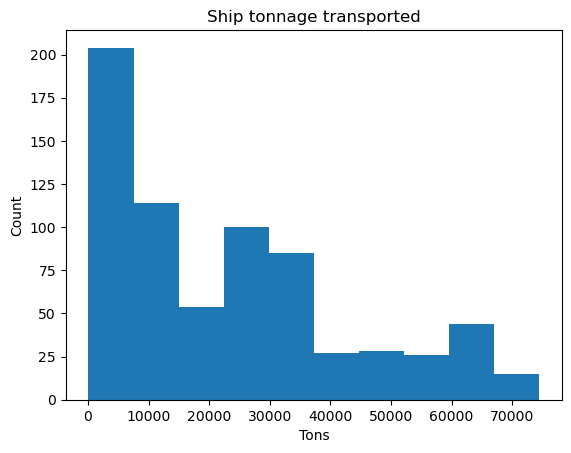

In [26]:
# Create a histogram plot of tonnage. Comment.

plt.hist(sea['tonnage'])
plt.title('Ship tonnage transported')
plt.xlabel('Tons')
plt.ylabel('Count')
plt.show


In [27]:
# Comment: 
# -- The histogram is Right-Skewed as it has a tail on the right.
# -- Most of the tonnage is below 20,000 tons.

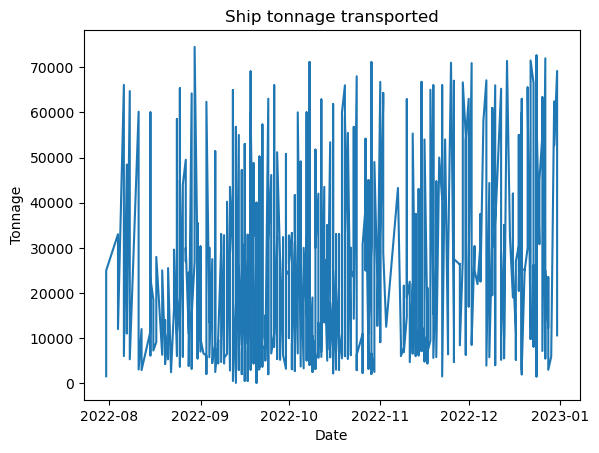

In [28]:
# Create a timeseries plot of departure (on x-axis) vs. tonnage (on y-axis). Comment.

plt.plot(sea['departure'],sea['tonnage'])
plt.title('Ship tonnage transported')
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.show()

In [29]:
# Comment: 
# -- The plot does not show any trend in the raw data of tonnage.

In [30]:
### Further dissecting the tonnage gives more insight

sea_tonnage = sea[sea['status']=='Outbound'][['departure', 'tonnage']]
sea_tonnage = sea_tonnage.groupby(['departure'], as_index=False)['tonnage'].sum()
sea_tonnage.sort_index(inplace=True)
sea_tonnage = sea_tonnage.set_index('departure')


# Exponential weighted moving average
sea_tonnage['ewma_s3'] = sea_tonnage['tonnage'].ewm(span=3).mean() # 3 months
sea_tonnage['ewma_s7'] = sea_tonnage['tonnage'].ewm(span=7).mean() # 7 months
sea_tonnage['ewma_s12'] = sea_tonnage['tonnage'].ewm(span=12).mean() # 12 months

sea_tonnage.head(5)

,tonnage,ewma_s3,ewma_s7,ewma_s12
departure,,,,
2022-07-31,1527.0,1527.000000,1527.000000,1527.000000
2022-08-04,58041.0,39203.000000,33820.714286,32138.750000
2022-08-06,161084.0,108849.285714,88853.486486,82466.110855
2022-08-07,59459.0,82507.800000,78103.502857,75203.665086
2022-08-08,70020.0,76062.483871,75453.852753,73795.281809


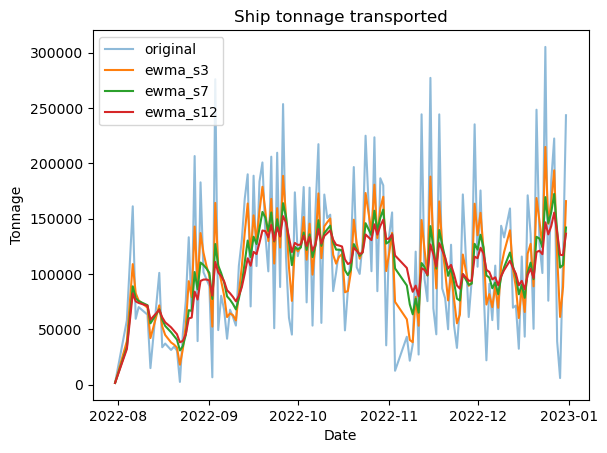

In [31]:
# Plot

plt.plot(sea_tonnage.index,sea_tonnage['tonnage'], label='original', alpha=0.5)
plt.plot(sea_tonnage.index,sea_tonnage['ewma_s3'], label='ewma_s3')
plt.plot(sea_tonnage.index,sea_tonnage['ewma_s7'], label='ewma_s7')
plt.plot(sea_tonnage.index,sea_tonnage['ewma_s12'], label='ewma_s12')

plt.title('Ship tonnage transported')
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.legend()
plt.show()

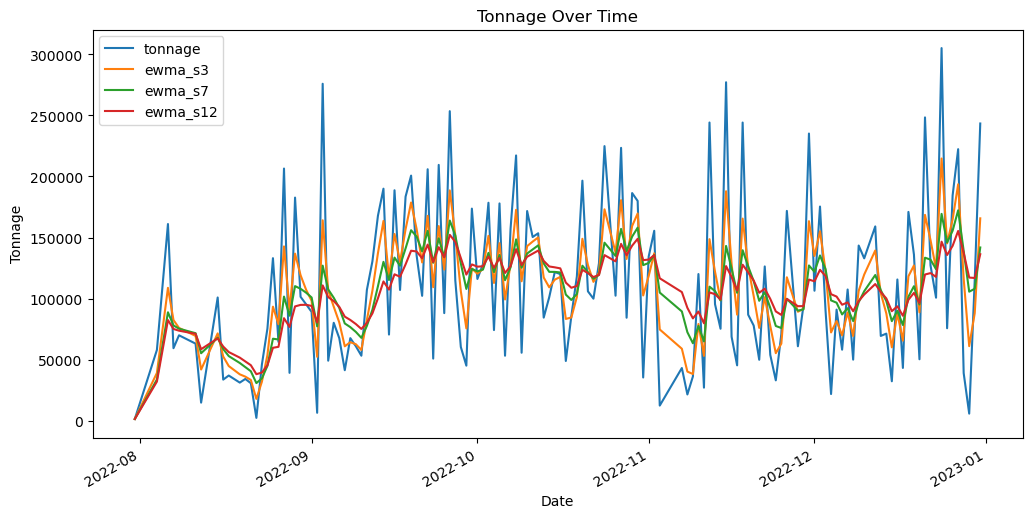

In [32]:
sea_tonnage.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Tonnage')
plt.title('Tonnage Over Time')
plt.show()


##### Seasonal decomposition

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

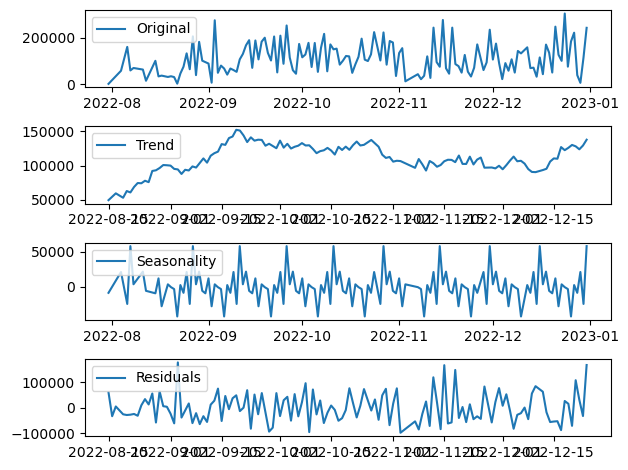

In [34]:
decomposition = seasonal_decompose(x=sea_tonnage['tonnage'], model='additive', period=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.subplot(411)
plt.plot(sea_tonnage['tonnage'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


##### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/erv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


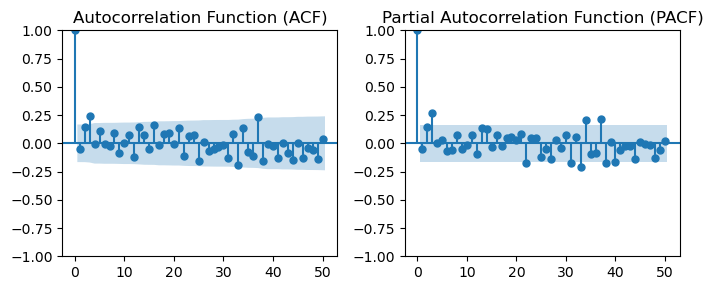

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Plot the ACF
plot_acf(sea_tonnage['tonnage'], ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot the PACF
plot_pacf(sea_tonnage['tonnage'], ax=ax2, lags=50)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


##### Augmented Dickey-Fuller (ADF) test

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
# Perform the ADF test
result = adfuller(sea_tonnage['tonnage'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is stationary (reject the null hypothesis).')
else:
    print('The time series is non-stationary (fail to reject the null hypothesis).')

ADF Statistic: -4.5331
p-value: 0.0002
The time series is stationary (reject the null hypothesis).


### Other visualizations

In [39]:
# Create bar plots of mean values with sd error bars. Comment.

# Create a function to get mean values and standard deviation:

def get_mean_sd(dfx,col_var):
    
    # get category list
    category_list = get_list(dfx,col_var)
    
    # create subset to find mean and sd for that particular subset
    dfx = dfx[dfx[col_var].isin(category_list)]
    
    # calculate mean and sd
    df = dfx.groupby([col_var])['tonnage'].mean().reset_index().rename(columns={'tonnage':'mean'})
    df['sd'] = dfx.groupby([col_var])['tonnage'].std().reset_index(drop=True)
    
    # convert to string
    df['col_var'] = df[col_var].astype(str)
    
    # sort values by mean
    df = df.sort_values(by = 'mean', ascending = False)
    df = df.head(25)
    
    return df

# Create a function to draw plot

def get_plot(dfx, col_var, title, xlabel, ylabel):
    
    # convert col_var to string
    dfx[col_var] = dfx[col_var].astype(str)
    
    # plot
    plt.figure(figsize=(5,3))
    plt.barh(dfx[col_var],dfx['mean'])
    
    plt.errorbar(y=dfx[col_var], x=dfx['mean'],
                xerr=dfx['sd'],
                linestyle='',capsize=5, ecolor='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()
    return

# 1) Tonnage by vessel name
df_vessel_name = get_mean_sd(dfx = sea, col_var='vessel_name') 
#df_vessel_name

get_plot(df_vessel_name, 'vessel_name',
         title = 'Tonnage by vessel name',
         xlabel = 'Tonnage (mean+/-sd)',
         ylabel = 'Vessel name')
plt.show()       

# 2) Tonnage by departure port
df_dep_port = get_mean_sd(dfx = sea, col_var='departure_port') 
#df_dep_port

get_plot(df_dep_port, 'departure_port',
         title = 'Tonnage by departure port',
         xlabel = 'Tonnage (mean+/-sd)',
         ylabel = 'Departure port')

# 3) Tonnage by commodity
df_commodity = get_mean_sd(dfx = sea, col_var='commodity') 
#df_commodity

get_plot(df_commodity, 'commodity',
         title = 'Tonnage by commodity',
         xlabel = 'Tonnage (mean+/-sd)',
         ylabel = 'Commodity')

# 4) Tonnage by departure month
df_dep_month = get_mean_sd(dfx = sea, col_var='dep_month') 
#df_dep_month

get_plot(df_dep_month, 'dep_month',
         title = 'Tonnage by departure month',
         xlabel = 'Tonnage (mean+/-sd)',
         ylabel = 'Departure month')



NameError: name 'get_list' is not defined

In [40]:
# Comment:(Tonnage by vessel name)
# -- ENEIDA vessel has a higher mean tonnage.
# -- However, the sd values are high that suggest high variability

# Comment:(Tonnage by departure port)
# -- The sd are very large that shows to be no difference in the mean tonnage by port

# Comment:(Tonnage by commodity)
# -- Rapeseed, Corn, Wheat, Sunflower meal seem to have a higher mean tonnage as compared to peas
# -- There is high variability in the data

# Comment(Tonnage by departure month)
# -- The sd is large, os the mean tonnage by month seems to be the same

countrys that have more than 50 rows of data: ['China', 'Italy', 'Spain', 'Türkiye']
    country  count
5     China     54
19    Italy     84
33    Spain    107
37  Türkiye    170
Shape:  (415, 23)


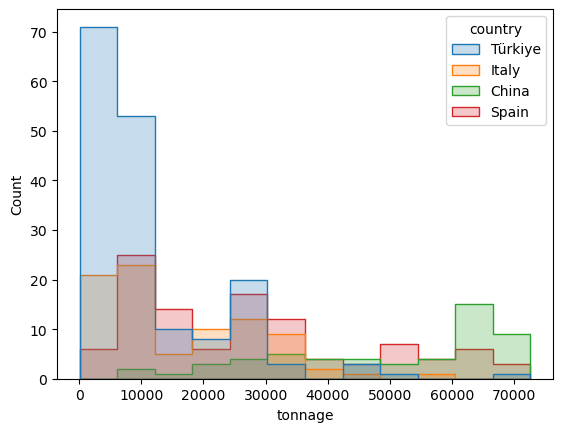

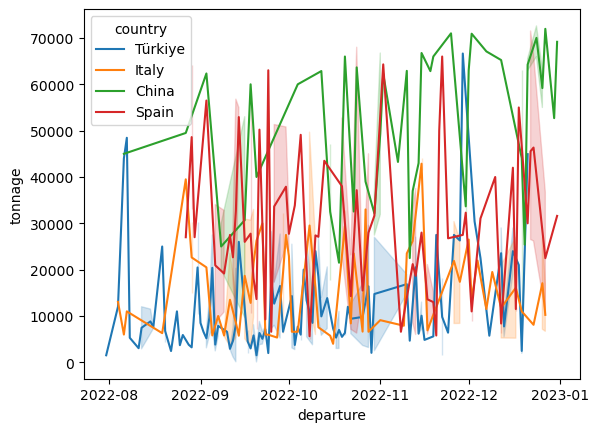

In [41]:
# Create histogram plot for only those countries that have more than 50 rows of data. Comment.

temp = sea.groupby(['country'])['status'].count().reset_index().rename(columns = {'status':'count'})
#temp
temp = temp[temp['count']>50]
temp
subset_country_list = temp['country'].tolist()
print('countrys that have more than 50 rows of data:',subset_country_list)
print(temp)

df = sea[sea['country'].isin(subset_country_list)]
df.head()
print('Shape: ',df.shape)

sns.histplot(data=df, x='tonnage', hue='country', element='step',fill=True)
plt.show()

# Create timeseries plot of departure vs. tonnage by above countries. Comment.

sns.lineplot(data=df, x='departure', y='tonnage', hue='country')
plt.show()


In [42]:
# Comment:
# -- Histogram suggests that most of the low tonnage ships are from Turkey and high tonnage ships
#    are from China

# -- Timeseries plot shows that there is no clear trend. Although, the tonnage from China seems 
#    to be on the higher side.

### Statistical analysis

In [43]:
import scipy.stats as stats

(244, 3)
p_value: 0.6534
The scores in developing and developed are not significantly different.


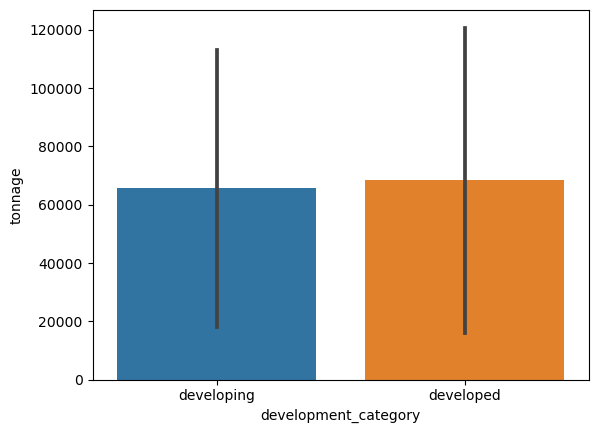

In [44]:
# Is there a significant difference in the daily 
# developing and developed category for total tonnage by day?

sea_dev = sea[['departure', 'development_category', 'tonnage']]
sea_dev = sea_dev.groupby(['departure','development_category'], as_index=False)['tonnage'].sum()
print(sea_dev.shape)

developing = sea_dev[sea_dev['development_category']=='developing']['tonnage']
developed = sea_dev[sea_dev['development_category']=='developed']['tonnage']


# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(developing, developed)

# Compare p-value to the significance level (e.g., 0.05)
alpha = 0.05
print("p_value:", round(p_value,4))
if p_value < alpha:
    print("The scores in developing and developed are significantly different.")
else:
    print("The scores in developing and developed are not significantly different.")

# plot
sns.barplot(data=sea_dev, x="development_category", y="tonnage", errorbar="sd")
plt.show()

In [45]:
sns.__version__

'0.12.2'

(440, 3)
p_value: 0.0006
The scores in Corn and Wheat are significantly different.


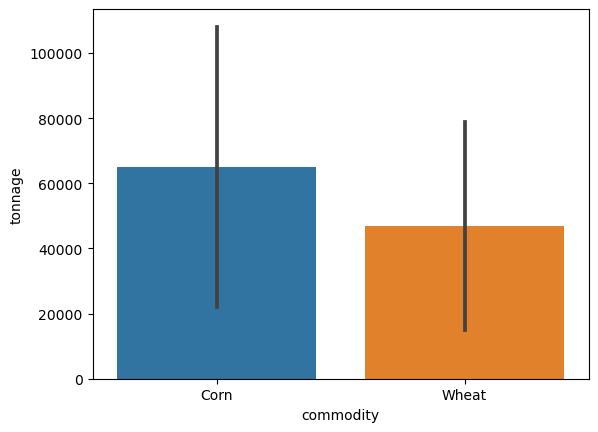

In [158]:
# Is there a significant difference in   
# corn and wheat commodity for total tonnage by day?

sea_dev = sea[['departure', 'commodity', 'tonnage']]
sea_dev = sea_dev.groupby(['departure','commodity'], as_index=False)['tonnage'].sum()
print(sea_dev.shape)

corn = sea_dev[sea_dev['commodity']=='Corn']['tonnage']
wheat = sea_dev[sea_dev['commodity']=='Wheat']['tonnage']


# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(corn, wheat)

# Compare p-value to the significance level (e.g., 0.05)
alpha = 0.05
print("p_value:", round(p_value,4))
if p_value < alpha:
    print("The scores in Corn and Wheat are significantly different.")
else:
    print("The scores in Corn and Wheat are not significantly different.")

# plot
sns.barplot(data=sea_dev[sea_dev['commodity'].isin(['Corn', 'Wheat'])], 
            x="commodity", y="tonnage", errorbar="sd")
plt.show()

(287, 3)
p_value: 0.0
The scores in 'Europe & Central Asia' and 'Middle East & North Africa' are significantly different.


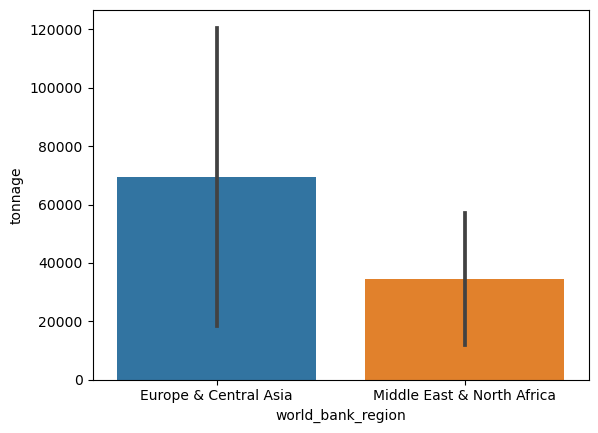

In [159]:
# Is there a significant difference in 
# 'Europe & Central Asia' and 'Middle East & North Africa' for total tonnage by day?

sea_dev = sea[['departure', 'world_bank_region', 'tonnage']]
sea_dev = sea_dev.groupby(['departure','world_bank_region'], as_index=False)['tonnage'].sum()
print(sea_dev.shape)

corn = sea_dev[sea_dev['world_bank_region']=='Europe & Central Asia']['tonnage']
wheat = sea_dev[sea_dev['world_bank_region']=='Middle East & North Africa']['tonnage']


# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(corn, wheat)

# Compare p-value to the significance level (e.g., 0.05)
alpha = 0.05
print("p_value:", round(p_value,4))
if p_value < alpha:
    print("The scores in 'Europe & Central Asia' and 'Middle East & North Africa' are significantly different.")
else:
    print("The scores in 'Europe & Central Asia' and 'Middle East & North Africa' are not significantly different.")

# plot
sns.barplot(data=sea_dev[sea_dev['world_bank_region'].isin(['Europe & Central Asia', 'Middle East & North Africa'])], 
            x="world_bank_region", y="tonnage", errorbar="sd")
plt.show()

#### Chi-square contingency test

In [163]:
from scipy.stats import chi2_contingency

In [168]:
# Is there any association between country and type of commodity shipped?

# Create a contingency table using pd.crosstab()
contingency_table = pd.crosstab(sea['country'], sea['commodity'])

# Apply chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", round(p_value,4))

Chi-square statistic: 1526.7875695751688
P-value: 0.0


In [172]:
# Is there any association between departure_port and vessel_name shipped?

# Create a contingency table using pd.crosstab()
contingency_table = pd.crosstab(sea['departure_port'], sea['vessel_name'])

# Apply chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", round(p_value,4))

Chi-square statistic: 1163.767471155366
P-value: 0.0
